In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.linear_model import LinearRegression

In [2]:
# Albina Office Hours Wdnesday 16:00 - 17:30 463
def generate_data(b1, b0, size, x_range=(-10, 10), noise_mean=0,
                  noise_std=1):
    """
          input:
          b1, b0 - true parameters of data
          size - size of data, numbers of samples
    x_range - tuple of (min, max) x-values
    noise_mean - noise mean value
    noise_std - noise standard deviation

          output:
          data_x, data_y - data features
          """
    noise = np.random.normal(noise_mean, noise_std, size)
    rnd_vals = np.random.rand(size)
    data_x = x_range[1] * rnd_vals + x_range[0] * (1 - rnd_vals)
    data_y = b1 * data_x + b0 + noise
    
    return data_x, data_y


def least_squares(x, y):
    """
    input:
    x, y - data features

    output:
    b1, b0 - predicted parameters of data
    """
    mean_x = x.mean()
    mean_y = y.mean()

    b1 = np.dot(y - mean_y, x - mean_x) / np.dot(x - mean_x, x - mean_x)
    b0 = mean_y - b1 * mean_x

    return b1, b0


def animate(data_x, data_y, true_b1, true_b0, LS, GD, x_range=(-10, 10)):
    plt.scatter(data_x, data_y)
    plt.plot([x_range[0], x_range[1]],
             [x_range[0] * true_b1 + true_b0, x_range[1] * true_b1 + true_b0],
             c="r", linewidth=2, label="True")
    ls_b1, ls_b0 = LS[0], LS[1]
    gd_b1, gd_b0 = GD[0], GD[1]
    plt.plot([x_range[0], x_range[1]],
             [x_range[0] * ls_b1 + ls_b0, x_range[1] * ls_b1 + ls_b0],
             c="g", linewidth=2, label='Least squares')
    plt.plot([x_range[0], x_range[1]],
             [x_range[0] * gd_b1 + gd_b0, x_range[1] * gd_b1 + gd_b0],
             c="b", linewidth=2, label='Gradient descent')
    plt.legend()
    plt.show()

In [49]:
def gradient_descent(x, y, alfa=0.03, stop=10, debug=False):
    """
    input:
    x, y - data features
    
    output:
    b1, b0 - predicted parameters of data
    """
    def mse(x, y, b0, b1, n):
        mse = 0
        for _ in range(n):
            mse += (y[_] - (b1 * x[_] + b0))**2
        return mse / n
    
    def derived_vals(x, y, b0, b1, n):
        derive_b0 = 0
        derive_b1 = 0
        for _ in range(n):
            derive_b0 +=(y[_] - (b1 * x[_] + b0))
            derive_b1 += x[_] * (y[_] - (b1 * x[_] + b0))
        derive_b0 = derive_b0 * (-2) / n
        derive_b1 = derive_b1 * (-2) / n
        
        return derive_b0, derive_b1
    
    x_vals, y_vals = [], []
    print("#"*10)
    print("Gradient descent starts execution")
    N = len(x)
    b0, b1, b1_best, b0_best = 0, 0, 0, 0
    mse_new = mse(x, y, b0, b1, N)
    mse_min = mse_new
    mse_old = 0
    iteration = 0
    while (math.fabs(mse_new) > stop and iteration < 5000):
        derived_b0, derived_b1 = derived_vals(x, y, b0, b1, N)
        if mse_new - mse_old > 10000:
            raise Exception('Wrong param alfa')
        b1 -= alfa * derived_b1
        b0 -= alfa * derived_b0
        mse_old = mse_new
        mse_new = mse(x, y, b0, b1, N)
        if mse_min > mse_new:
            mse_min = mse_new
            b1_best = b1
            b0_best = b0
        if iteration % 100 == 0:
            alfa *= 0.95
            if debug:
                print("iteration {}, old MSE = {}, new MSE = {} :: b0 = {} , b1 = {}".format(iteration, mse_old, mse_new, b0, b1))
        iteration += 1    
    print("End of gradient descent execution")
    print("#"*10)
    return b1_best, b0_best


In [50]:
### Parameters for data generation ###
true_b1 = 2.5
true_b0 = -7
size = 100
x_range = (0, 10)
noise_mean = 0
noise_std = 1

##########
Gradient descent starts execution
End of gradient descent execution
##########
true b1 : 2.5
true b0 : -7
calculated LS b1 : 2.421355630694733
calculated LS b0 : -6.626498263587821
calculated GD b1 : 2.42135563028803
calculated GD b0 : -6.626498260916842


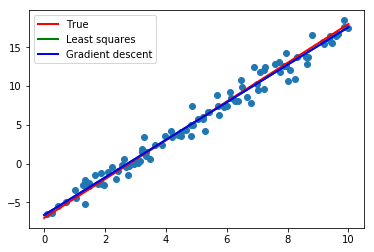

In [52]:
# Generate the data
data_x, data_y = generate_data(true_b1, true_b0, size,
                               x_range=x_range,
                               noise_mean=noise_mean,
                               noise_std=noise_std)

# Predict data's parameters
ls_b1, ls_b0 = least_squares(data_x, data_y)
gd_b1, gd_b0 = gradient_descent(data_x, data_y, alfa=0.03, stop=1e-5, debug=False)


# plt.scatter(data_x, data_y, c='g')
# plt.show()

# Visualize the data
print("true b1 : {}\ntrue b0 : {}".format(true_b1, true_b0))
print("calculated LS b1 : {}\ncalculated LS b0 : {}".format(ls_b1, ls_b0))
print("calculated GD b1 : {}\ncalculated GD b0 : {}".format(gd_b1, gd_b0))

animate(data_x, data_y, true_b1, true_b0, (ls_b1, ls_b0), (gd_b1, gd_b0), x_range=x_range)

In [53]:
def shuffle_data(x, y, ratio):
    train_x, train_y, test_x, test_y = [], [], [], []
    for i in range(len(x)):
        if random.random() < ratio:
            train_x.append(x[i])
            train_y.append(y[i])      
        else:
            test_x.append((x[i], ))
            test_y.append(y[i])
    return np.array([train_x]), np.array([train_y]), test_x, test_y

In [54]:
train_x, train_y, test_x, test_y = shuffle_data(data_x, data_y, 0.7)

In [55]:
def scikit_implementation(x, y):
    regression_model = LinearRegression()
    regression_model.fit(x, y)
    return regression_model.coef_[0][0], regression_model.intercept_[0]

In [184]:
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from scipy import stats

In [115]:
regression_model = LinearRegression()
regression_model.fit(pd.DataFrame(data_x), pd.DataFrame(data_y))
sc_b1, sc_b0 = regression_model.coef_[0][0], regression_model.intercept_[0]


# R squared value
R2 = regression_model.score(test_x, test_y)
# MSE
y_predict = regression_model.predict(test_x)
regression_model_mse = mean_squared_error(y_predict, test_y)


In [152]:
def fill_na(mpg, column):
    avg = 0
    for index, row in mpg.iterrows():
        if row[column] in '?':
            mpg.at[index, column] = np.nan
        else:
            avg += (float)(mpg.at[index, column])
    avg /= len(mpg[column])
    return mpg.fillna({column: avg})

def split_dataset(x, y, ratio=0.7):
    size_of_set = x.shape[0]
    size_of_train_set = int(size_of_set*ratio)
    x_train = x.iloc[:size_of_train_set, :]
    y_train = y.iloc[:size_of_train_set, :]
    x_test = x.iloc[size_of_train_set:size_of_set,:]
    y_test = y.iloc[size_of_train_set:size_of_set,:]

    return x_train, y_train, x_test, y_test

def get_mse(l1, l2):
    len1 = len(l1)
    len2 = len(l2)
    if len1 != len2:
        raise Exception("Wrong sizes")
    mse = 0
    for _ in range(len1):
        mse += (l1[_] - l2[_])**2
    mse /= len1
    return mse

In [204]:
mpg = pd.read_csv("datasets/mpg.csv")
# Preprocess data
mpg = fill_na(mpg, 'horsepower')
mpg['horsepower'] = mpg.horsepower.astype(float)
mpg = pd.DataFrame(mpg.iloc[:, 0:5])
mpg = shuffle(mpg)
# Split data
x = pd.DataFrame(mpg.iloc[:, 1:5])
y = pd.DataFrame(mpg['mpg'])
x_train, y_train, x_test, y_test = split_dataset(x, y, 0.7)

In [206]:
lm = LinearRegression()
lm.fit(x, y)

coefs = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(x)
mse_t = get_mse(y['mpg'].values, predictions)
var_t = mse_t * (np.linalg.inv(np.dot(x.T, x)).diagonal())

sd_b = np.sqrt(var_b)
ts_b = coefs[1:] / sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
coefs = np.round(coefs,4)

sd_b = np.append([0], sd_b)
ts_b = np.append([0], ts_b)
p_values = np.append([0], p_values)
names = ['Intercept', 'cylinders', 'displacement', 'horsepower', 'weight']

df = pd.DataFrame()
df["Coefficients"],df["Standard Errors"],df["t values"],df["Probabilites"], df['Names'] = [coefs,sd_b,ts_b,p_values, names]
print(df)

   Coefficients  Standard Errors  t values  Probabilites         Names
0       45.7462            0.000     0.000         0.000     Intercept
1       -0.3578            0.075    -4.759         0.000     cylinders
2       -0.0013            0.001    -1.161         0.248  displacement
3       -0.0387            0.003   -13.480         0.000    horsepower
4       -0.0054            0.000   -39.480         0.000        weight


In [128]:
# cyl = pd.DataFrame(mpg['mpg'], mpg['cylinders'])
# x = 'model_year'
# y = 'mpg'
# plt.scatter(mpg[x], mpg[y])
# plt.xlabel(x)
# plt.ylabel(y)
# plt.show()
# print(cylinders)


cylinders         int64
displacement    float64
horsepower      float64
weight            int64
dtype: object
